DEFAULT RISK ANALYSIS FOR CREDIT CARDS CLIENTS

In [160]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix

In [5]:
df = pd.read_csv('data/UCI_Credit_Card.csv')

In [6]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

In [8]:
df['SEX'] = df['SEX'].replace({1:'male', 2:'female'})
df['EDUCATION'] = df['EDUCATION'].replace({1:'graduate school', 2:'university', 3:'high school', 
                                           4:'others', 5:'unknown', 6:'unknown', 0:'unknown'})
df['MARRIAGE'] = df['MARRIAGE'].replace({1:'married', 2:'single', 3:'others', 0:'others'})

In [9]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,female,university,married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,female,university,single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,female,university,single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,female,university,married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,male,university,married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [10]:
df.drop(['ID','SEX','EDUCATION','MARRIAGE','default.payment.next.month'],axis=1).describe()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [11]:
sns.set(style="darkgrid")

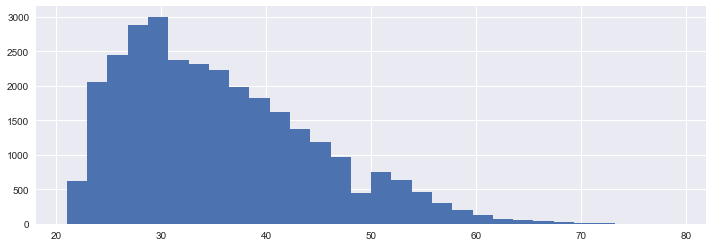

In [81]:
df['AGE'].hist(bins=30, figsize=(12,4))

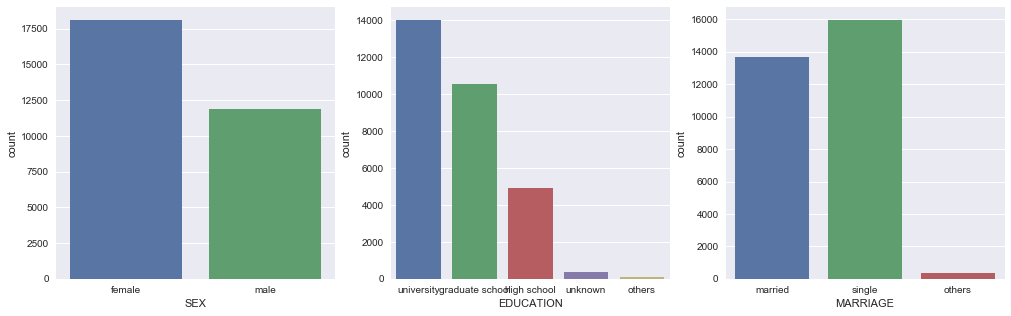

In [13]:
plt.figure(figsize=(17,5))

plt.subplot(1,3,1)
sns.countplot('SEX', data=df)

plt.subplot(1,3,2)
sns.countplot('EDUCATION', data=df)

plt.subplot(1,3,3)
sns.countplot('MARRIAGE', data=df)

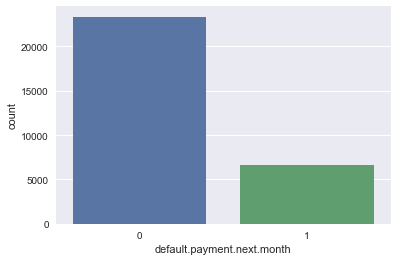

In [14]:
sns.countplot(x='default.payment.next.month', data=df)

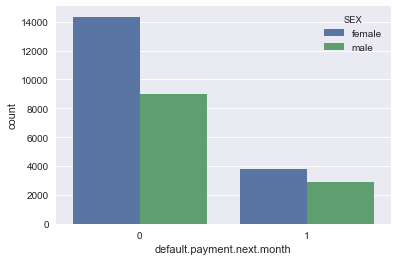

In [15]:
sns.countplot(x='default.payment.next.month', data=df, hue='SEX')

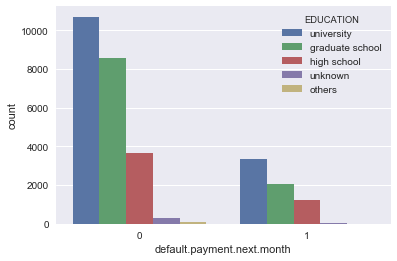

In [16]:
sns.countplot(x='default.payment.next.month', data=df, hue='EDUCATION')

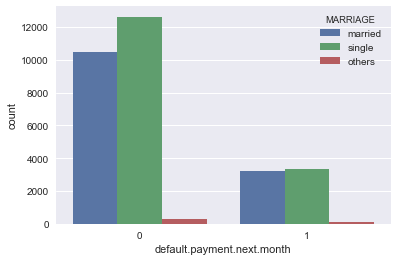

In [17]:
sns.countplot(x='default.payment.next.month', data=df, hue='MARRIAGE')

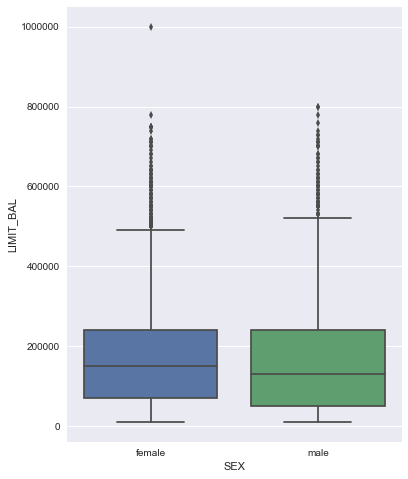

In [18]:
plt.figure(figsize=(6,8))
sns.boxplot(x='SEX', y='LIMIT_BAL', data=df)

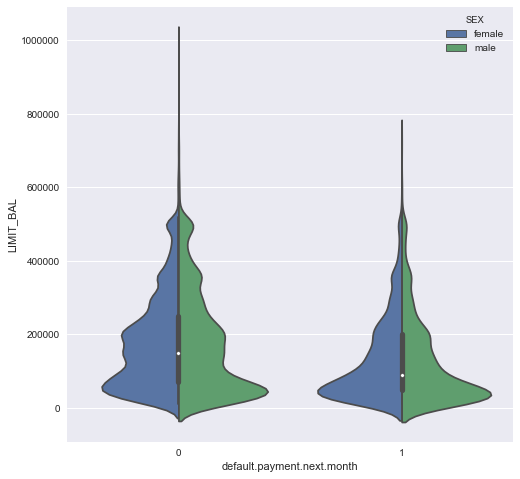

In [19]:
plt.figure(figsize=(8,8))
sns.violinplot(x='default.payment.next.month', y='LIMIT_BAL', hue='SEX', split=True, data=df)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


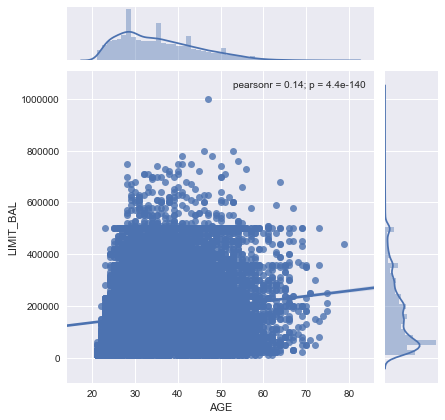

In [82]:
sns.jointplot('AGE', 'LIMIT_BAL', data=df, kind='reg')

In [83]:
sex = pd.get_dummies(df['SEX'], drop_first=True)
education = pd.get_dummies(df['EDUCATION'], prefix='education')
marriage = pd.get_dummies(df['MARRIAGE'], prefix='marital status')

df_final = pd.concat([df,sex,education,marriage], axis=1)

df_final.drop(['SEX','EDUCATION','MARRIAGE'], axis=1, inplace=True)

In [84]:
df_final.head()

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,default.payment.next.month,male,education_graduate school,education_high school,education_others,education_university,education_unknown,marital status_married,marital status_others,marital status_single
0,1,20000.0,24,2,2,-1,-1,-2,-2,3913.0,...,1,0,0,0,0,1,0,1,0,0
1,2,120000.0,26,-1,2,0,0,0,2,2682.0,...,1,0,0,0,0,1,0,0,0,1
2,3,90000.0,34,0,0,0,0,0,0,29239.0,...,0,0,0,0,0,1,0,0,0,1
3,4,50000.0,37,0,0,0,0,0,0,46990.0,...,0,0,0,0,0,1,0,1,0,0
4,5,50000.0,57,-1,0,-1,0,0,0,8617.0,...,0,1,0,0,0,1,0,1,0,0


In [85]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 31 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6                     30000 non-null float64
PAY_AMT1                      30000 non-null float64
PAY_AMT2                      30000 non-null float64
PAY_AM

In [23]:
df_final.columns

Index(['ID', 'LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month',
       'male', 'education_graduate school', 'education_high school',
       'education_others', 'education_university', 'education_unknown',
       'marital status_married', 'marital status_others',
       'marital status_single'],
      dtype='object')

*************************************************************************************



LOGISTIC REGRESSION

In [195]:
X = df_final[['LIMIT_BAL', 'AGE', 'male', 
        'education_graduate school', 'education_high school', 'education_others', 'education_university', 'education_unknown',
        'marital status_married', 'marital status_others', 'marital status_single']]
y = df['default.payment.next.month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [196]:
logistic_reg_model = LogisticRegression()

logistic_reg_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [197]:
pred_lr = logistic_reg_model.predict(X_test)

In [198]:
print(confusion_matrix(y_test,pred_lr))
print('\n')
print(classification_report(y_test,pred_lr))

[[6969    0]
 [2031    0]]


             precision    recall  f1-score   support

          0       0.77      1.00      0.87      6969
          1       0.00      0.00      0.00      2031

avg / total       0.60      0.77      0.68      9000



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**************

K NEAREST NEIGHBORS

In [199]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [200]:
pred_knn = knn.predict(X_test)

In [201]:
print(confusion_matrix(y_test,pred_knn))
print('\n')
print(classification_report(y_test,pred_knn))

[[5429 1540]
 [1475  556]]


             precision    recall  f1-score   support

          0       0.79      0.78      0.78      6969
          1       0.27      0.27      0.27      2031

avg / total       0.67      0.67      0.67      9000



Optimal K-value

In [202]:
error_rate = []

for i in range(1,35):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

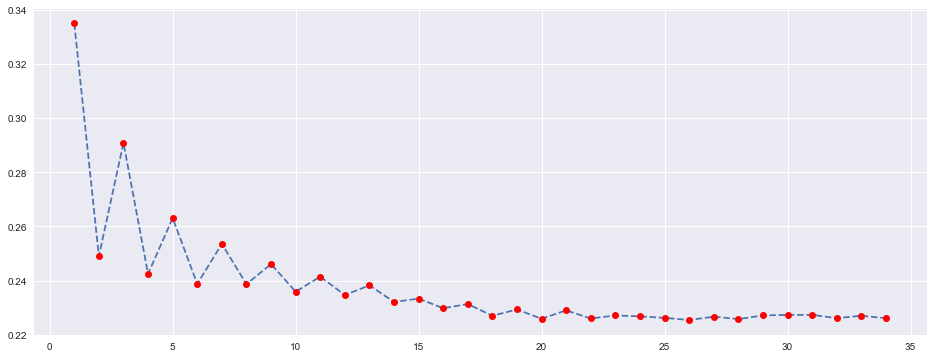

In [204]:
plt.figure(figsize=(16,6))
plt.plot(range(1,35), error_rate, ls='dashed', marker='o', markerfacecolor='red')

In [205]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)

In [207]:
print(confusion_matrix(y_test,pred_knn))
print('\n')
print(classification_report(y_test,pred_knn))

[[6915   54]
 [1979   52]]


             precision    recall  f1-score   support

          0       0.78      0.99      0.87      6969
          1       0.49      0.03      0.05      2031

avg / total       0.71      0.77      0.69      9000

